In [66]:
#References
#https://bootcampspot-v2.com/sessions/472909/videos/25279
#http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.set_value.html
#https://stackoverflow.com/questions/5244810/python-appending-a-dictionary-to-a-list-i-see-a-pointer-like-behavior
#https://stackoverflow.com/questions/5242933/what-was-the-motivation-for-doing-lists-augmented-assignment-in-place-in-py
#https://stackoverflow.com/questions/4432208/how-does-work-in-python
#https://python-reference.readthedocs.io/en/latest/docs/operators/modulus.html
#https://stackoverflow.com/questions/43668827/python-modulo-function
#https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names
#https://www.tutorialspoint.com/python/string_title.htm
#https://stackoverflow.com/questions/134934/display-number-with-leading-zeros
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
#https://matplotlib.org/examples/color/colormaps_reference.html
#dates from the openweatherapi are stored as [dt] Time of data calculation, unix, UTC
#https://openweathermap.org/current
#https://stackoverflow.com/questions/46565580/convert-unix-timestamp-in-python-to-datetime-and-make-2-hours-behind


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime, timedelta

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


In [33]:
#function for time conversion
#https://stackoverflow.com/questions/46565580/convert-unix-timestamp-in-python-to-datetime-and-make-2-hours-behind
def unixtodate(unix_ts):
    #unix_ts = 1507126064
    dt = (datetime.fromtimestamp(unix_ts) - timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    return dt


In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [5]:
#using the starter code, build a dataframe for lat/long visaid
#maybe create a dataframe with empty columns and then add to it?
#https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names

#bad syntax missing {}
#latlong_df = pd.DataFrame("Lat": lats, "Long": lngs)

latlong_df = pd.DataFrame({"Lat": lats, "Long": lngs})

latlong_df.head()

,Lat,Long
0,33.920657,6.541488
1,-32.544583,-52.077538
2,-63.874802,-32.002751
3,-70.006473,-55.730294
4,9.151994,133.164383


In [6]:
lat_lngs = zip(lats, lngs)

citiesnearby = []

In [7]:

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #find the total amount of cities nearby because im curious
    citiesnearby.append(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        #print(city)
        cities.append(city)

# Print the city count to confirm sufficient count
#print(len(cities))
#print(len(citiesnearby))

num_cities_found = len(cities)
num_coordinates = len(citiesnearby)

print(f'Using {num_coordinates} coordinates, found {num_cities_found} citie(s)')


Using 1500 coordinates, found 613 citie(s)


In [8]:
cities_df = pd.DataFrame({"Cities":cities})
cities_df.head()

,Cities
0,tuggurt
1,rio grande
2,mar del plata
3,ushuaia
4,meyungs


In [26]:
baseurl = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
units = "imperial"

# Build partial query URL
query_url = f"{baseurl}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=69958e30913d3cf9ab8231330ad52ba7&units=imperial&q=


In [35]:

#used for testing only --------->
#track the unique responses, found 2 [200, 404]
#responsetypes = [] 
#<-------------------------------

#set up a counter
counter = 0
numbreak = 15

#count cities added
citiesadded = 0

#set up a grouping or modulus group using %
modnum = 5
modgroup = 1

#weathercities = {"city":,"country":}
#dictionary object not working using list instead
weathercities = []

#testing print --------------------------->
print(f'Begin Processing from {len(cities)} Cities. {numbreak} Attempts')
print('Beginning Data Retrieval')
print('-----------------------------')

#<-----------end testing print


#loop through the dataframe
for index, row in cities_df.iterrows():
    #print(row["Cities"])
    thecity = row["Cities"]
    city_url = query_url + thecity
    #print(city_url)
    
    city_response = requests.get(city_url).json()
        

    ##This section for testing only ---------->
    ##checking for bad responses, only check to see if its possible to get have errors
    ##results are we found 2 different response types so we have to deal with them
    #responsetype = requests.get(city_url).status_code
    #if responsetype not in responsetypes:
    #    responsetypes.append(responsetype)
    ##<-----------------End testing reponse types
    
    #testing mod groups
    #if (index % 2 == 0):
        #modgroup +=1
    #<----end mod testing
        
    
    
    #if we find a response with 404 we need to skip it
    responsetype = requests.get(city_url).status_code
    #print(responsetype)
    
    if responsetype == 200:
        citiesadded += 1
        #print(responsetype)
        #print(city_response["id"])
        #print(city_response["sys"]["country"])
        city_id = city_response["id"]
        city_country = city_response["sys"]["country"]
        city_lat = city_response["coord"]["lon"]
        city_long = city_response["coord"]["lat"]
        city_name = city_response["name"]
        city_temp_max = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_winds = city_response["wind"]["speed"]
        
        #use function to convert unix to datetime
        city_analysis_date = unixtodate(city_response["dt"])
        
        #make it so that the cities added Groupings are ONLY for cities added, 
        #and NOT for the entire list we are searching, this would give us inconsistencies in groups
        if (citiesadded % modnum ==0):
            modgroup +=1
        
        #print(f'ID:{city_id} Country:{city_country} City:{city_name}')
        
        #adding date of analysis
        weathercities.append({"cityid":city_id
                              ,"country":city_country
                              ,"city":city_name
                              ,"lat":city_lat
                              ,"long":city_long
                              ,"max temp":city_temp_max
                              ,"humidity":city_humidity
                              ,"cloudiness":city_clouds
                              ,"wind speed":city_winds
                              ,"groupingid":modgroup
                              ,"analysis date":city_analysis_date
                             })

        #print(f'Adding {counter} city{city_name} ModGroup# {modgroup}')
        #"{:10.4f}".format(x)
        #https://stackoverflow.com/questions/134934/display-number-with-leading-zeros
        print(f'{str(index).zfill(2)}: Add  {citiesadded} City: {thecity.title()} Group {modgroup}')
        
    else:
        #print(f'City:{thecity} Response:{responsetype}')
        print(f'{str(index).zfill(2)}: Skip ** City:{thecity.title()} not found.')
    
    #print(f'ModGroup# {modgroup}')
    
    
    #testing for the first 5 records
    if counter == numbreak:
        break
    
      
    counter+=1
        
        
print('-----------------------------')
print('Data Retrieval Complete      \n')
print('********SUMMARY**************')
print(f'Using {num_coordinates} coordinates, found {num_cities_found} citie(s).')
print(f'Created {modgroup} group(s) from a total of {len(weathercities)} citie(s).')
print('-----------------------------')


Begin Processing from 613 Cities. 15 Attempts
Beginning Data Retrieval
-----------------------------
00: Skip ** City:Tuggurt not found.
01: Add  1 City: Rio Grande Group 1
02: Add  2 City: Mar Del Plata Group 1
03: Add  3 City: Ushuaia Group 1
04: Skip ** City:Meyungs not found.
05: Add  4 City: Cherskiy Group 1
06: Add  5 City: Bluff Group 2
07: Add  6 City: Hithadhoo Group 2
08: Add  7 City: Hami Group 2
09: Add  8 City: Brae Group 2
10: Add  9 City: Hobart Group 2
11: Add  10 City: Port Lincoln Group 3
12: Skip ** City:Samusu not found.
13: Add  11 City: Punta Arenas Group 3
14: Add  12 City: Kerema Group 3
15: Add  13 City: Orlik Group 3
-----------------------------
Data Retrieval Complete      

********SUMMARY**************
Using 1500 coordinates, found 613 citie(s).
Created 3 group(s) from a total of 13 citie(s).
-----------------------------


In [36]:
print(weather_cities_df.count())
#weathercities[0:2]
weathercities[0]

city          13
cityid        13
cloudiness    13
country       13
grouping      13
humidity      13
lat           13
long          13
max temp      13
wind speed    13
dtype: int64


{'cityid': 3451138,
 'country': 'BR',
 'city': 'Rio Grande',
 'lat': -52.1,
 'long': -32.03,
 'max temp': 62.6,
 'humidity': 55,
 'cloudiness': 0,
 'wind speed': 13.87,
 'groupingid': 1,
 'analysis date': '2018-09-05 12:00:00'}

In [37]:
weather_cities_df = pd.DataFrame(weathercities)
weather_cities_df.head()

,analysis date,city,cityid,cloudiness,country,groupingid,humidity,lat,long,max temp,wind speed
0,2018-09-05 12:00:00,Rio Grande,3451138,0,BR,1,55,-52.10,-32.03,62.60,13.87
1,2018-09-05 12:13:06,Mar del Plata,3863379,92,AR,1,54,-67.52,-46.43,56.74,6.62
2,2018-09-05 12:00:00,Ushuaia,3833367,0,AR,1,70,-68.31,-54.81,44.60,6.40
3,2018-09-05 12:13:07,Cherskiy,2126199,44,RU,1,76,161.30,68.75,43.69,8.52
4,2018-09-05 12:13:08,Bluff,2175403,8,AU,2,89,149.07,-23.58,58.36,8.63


In [58]:
#get the max analysis date and use for plot titles etc.
analysisdate = weather_cities_df["analysis date"].max()

#split the date because we dont want the time
analysisdate = analysisdate.split(" ")

#use the date part of the date
analysisdate = analysisdate[0]
#https://stackoverflow.com/questions/14524322/how-to-convert-a-date-string-to-different-format
print(analysisdate)

#format to a nicer looking string to add to titles
analysisdate = datetime.strptime(analysisdate, '%Y-%m-%d').strftime('%m/%d/%y')
print(analysisdate)

2018-09-05
09/05/18


In [18]:
#export the dataframe to csv
weather_cities_df.to_csv("../data/testing_cities.csv")

In [25]:
#make sure all columns have the same counts, no nulls
weather_cities_df.count()

city          13
cityid        13
cloudiness    13
country       13
grouping      13
humidity      13
lat           13
long          13
max temp      13
wind speed    13
dtype: int64

In [63]:
#get the plot values

#x plot lattitudes
xplot_lats = weather_cities_df["lat"]


#temperatures
yplot_temp = weather_cities_df["max temp"]

#humidities
yplot_humid = weather_cities_df["humidity"]

#cloudiness
yplot_clouds = weather_cities_df["cloudiness"]

#wind speeds
yplot_winds = weather_cities_df["wind speed"]


begintitle = "City Latitude vs. "
endtitle =  " as of " + analysisdate

current_title = ""
current_x_title = ""
current_y_title = ""

ymarker = "o"
x_label = "Cities"



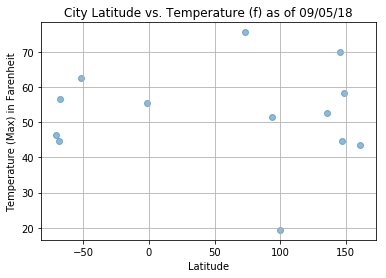

In [64]:
#Temperature (f) vs. Latitude
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
current_title = begintitle + "Temperature (f)" + endtitle
current_x_title = "Latitude"
current_y_title = "Temperature (Max) in Farenheit"


plt.scatter(xplot_lats, yplot_temp
            ,label=x_label, marker=ymarker
            ,alpha=.5)

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

plt.show()


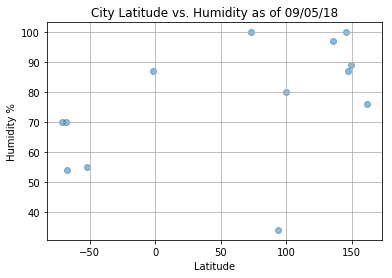

In [71]:
#Humidity (f) vs. Latitude
current_title = begintitle + "Humidity" + endtitle
#current_x_title = "Latitude"
current_y_title = "Humidity %"

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_humid
            ,label=x_label, marker=ymarker
            ,alpha=.5, cmap="plasma")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

plt.show()